In [7]:
import torch
from filepath import *
from datamanip.plots import generate_matrix
from models.GAT import GAT#, GCN, SimpleMPNN
from train_eval.train import train
from train_eval.evaluate import evaluate
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.datasetmanip.dataset_util import split_dataset

In [16]:
# Number of epochs to train the model
NUM_EPOCHS = 100

# Dropout rate for the model to prevent overfitting
DROPOUT_RATE = 0.3

# Learning rate for the optimizer
LEARNING_RATE = 0.0005

# Threshold for classifying reliability
THRESHOLD = 0.97

# Number of features for each node in the graph
NODE_FEATURES = 10

# Number of epochs to wait for improvement before early stopping
PATIENCE = 15


In [17]:
#Create list of Data objects, each containing the node features, edge indices, and target values
data_list = ThreeFiveDataset(root=dataset_path, match="3-4")
# data_list = ThreeFiveDataset(root=dataset_path, match="1-1")
# data_list = ThreeFiveDataset(root=dataset_path, match="2-1")
# data_list = ThreeFiveDataset(root=dataset_path, match="2-2")
# data_list = ThreeFiveDataset(root=dataset_path, match="alt3-2")
train_loader, val_loader, test_loader = split_dataset(data_list)


In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GAT(input_dim=NODE_FEATURES, hidden_dim=64, output_dim=2, dropout_rate=DROPOUT_RATE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()

In [20]:
train_config = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "device": device,
    "criterion": criterion,
    "optimizer": optimizer,
}

In [21]:
train(model, train_loader, val_loader, train_config, model_checkpoints_path + "best_model_GAT.pth")

Epoch 1/100, Train Loss: 0.3821
Epoch 1/100, Validation Loss: 0.3008
Best model updated based on validation loss.
Epoch 2/100, Train Loss: 0.3201
Epoch 2/100, Validation Loss: 0.3246
No improvement in validation loss for 1 epoch(s).


KeyboardInterrupt: 

In [11]:
# Load the best model after training
model.load_state_dict(torch.load(model_checkpoints_path + "best_model_GAT.pth", weights_only=True))

<All keys matched successfully>

In [12]:
true_values, predicted_values, accuracy = evaluate(device, model, test_loader, model_checkpoints_path + "best_model_GAT.pth")

GAT(
  (conv1): GATConv(5, 64, heads=1)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GATConv(64, 32, heads=1)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=32, out_features=2, bias=True)
)
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1)]
Accuracy: 0.9471


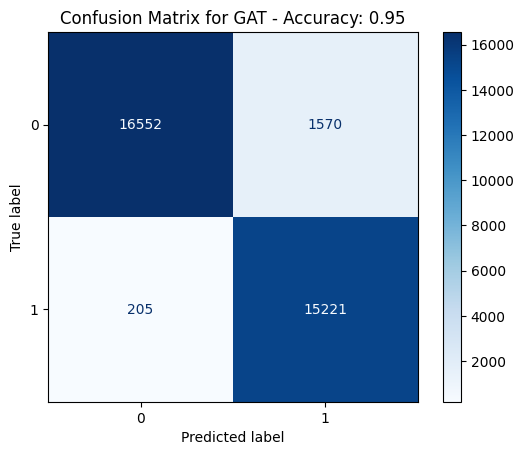

In [16]:
generate_matrix(true_values, predicted_values, accuracy, "GAT")